Credits: inspired by Raschka et al., Chap 15 - substantial changes applied


## Sequential Data Using Recurrent Neural Networks





---



### Warming up
![](https://github.com/cfteach/NNDL_DATA621/blob/10b57c7be9d3f31989a4f8cca7d21cccbae7754c/DATA621/DATA621/images/Hidden_vs_Output_Recurrence.png?raw=true)

**Mapping this to a sentence:**

Think of a sentence as a sequence of words:

> `"The cat sits on the mat"`

Each word corresponds to a **time step**.

So, the RNN would process the sentence like this:

| Time step | Input word | Symbol |
|-----------|------------|--------|
| t = 0     | `"The"`    | 𝑥⁽⁰⁾     |
| t = 1     | `"cat"`    | 𝑥⁽¹⁾     |
| t = 2     | `"sits"`   | 𝑥⁽²⁾     |
| t = 3     | `"on"`     | 𝑥⁽³⁾     |
| t = 4     | `"the"`    | 𝑥⁽⁴⁾     |
| t = 5     | `"mat"`    | 𝑥⁽⁵⁾     |

Each `𝑥⁽ᵗ⁾` (blue square) is a vector representation (e.g., an embedding) of the word at that time step.

In [23]:
import torch
import torch.nn as nn

torch.manual_seed(2)

rnn_layer = nn.RNN(input_size=5, hidden_size=2, num_layers=1, batch_first=True)
# single layer RNN, no stacking
# input_size=5: Each input vector at each time step has 5 features (i.e., input is 5-dimensional).
# hidden_size=2: The hidden state will have 2 features (small, but good for toy examples).
# num_layers=1: It's a single-layer RNN (no stacking).
# batch_first=True: Input/output tensors will be in the shape (batch, seq_len, input_size).

# weight_ih_l0: input-to-hidden weights of the first layer
# weight_hh_l0: is the hidden-to-hidden weight matrix of the first layer
w_xh = rnn_layer.weight_ih_l0  #by default they are initialized randomly
w_hh = rnn_layer.weight_hh_l0
b_xh = rnn_layer.bias_ih_l0
b_hh = rnn_layer.bias_hh_l0

print('W_xh shape:', w_xh.shape)
print('W_hh shape:', w_hh.shape)
print('b_xh shape:', b_xh.shape)
print('b_hh shape:', b_hh.shape)

W_xh shape: torch.Size([2, 5])
W_hh shape: torch.Size([2, 2])
b_xh shape: torch.Size([2])
b_hh shape: torch.Size([2])


In [24]:
x_seq = torch.tensor([[1.0]*5, [2.0]*5, [3.0]*5]).float()
print(x_seq.shape)

torch.Size([3, 5])


In [25]:
w_xh

Parameter containing:
tensor([[ 0.1622, -0.1683,  0.1939, -0.0361,  0.3021],
        [ 0.1683, -0.0813, -0.5717,  0.1614, -0.6260]], requires_grad=True)

Let's define an input

In [26]:
x_seq = torch.tensor([[1.0]*5, [2.0]*5, [3.0]*5]).float()
x_seq

tensor([[1., 1., 1., 1., 1.],
        [2., 2., 2., 2., 2.],
        [3., 3., 3., 3., 3.]])

In [27]:
x_seq = torch.tensor([[1.0]*5, [2.0]*5, [3.0]*5]).float()

## output of the simple RNN:
output, hn = rnn_layer(torch.reshape(x_seq, (1, 3, 5)))

# hn will correspond to the hidden state after the last time step

print('\n\n')
print('Output shape:', output.shape)
print('Output tensor:')
print(output)
print('\nHidden shape:', hn.shape)
print('Hidden tensor:')
print(hn)
print('\n\n')







Output shape: torch.Size([1, 3, 2])
Output tensor:
tensor([[[ 0.6642, -0.7906],
         [ 0.8561, -0.9886],
         [ 0.9403, -0.9987]]], grad_fn=<TransposeBackward1>)

Hidden shape: torch.Size([1, 1, 2])
Hidden tensor:
tensor([[[ 0.9403, -0.9987]]], grad_fn=<StackBackward0>)





In [28]:
## remember:
# x_seq shape: torch.Size([3, 5])
# W_xh shape: torch.Size([2, 5])
# W_hh shape: torch.Size([2, 2])
# b_xh shape: torch.Size([2])
# b_hh shape: torch.Size([2])


## manually computing the output:
out_man = []
for t in range(3):
    xt = torch.reshape(x_seq[t], (1, 5))
    print(f'Time step {t} =>')
    print('   Input           :', xt.numpy())

    ht = torch.matmul(xt, torch.transpose(w_xh, 0, 1)) + b_xh
    print('   Hidden (manual)           :', ht.detach().numpy())
    #print('   Hidden (PyTorch)       :', hn[:, t].detach().numpy())


    if t>0:
        prev_h = out_man[t-1]
    else:
        prev_h = torch.zeros((ht.shape))

    ot = ht + torch.matmul(prev_h, torch.transpose(w_hh, 0, 1)) + b_hh
    ot = torch.tanh(ot)
    out_man.append(ot)
    print('')
    print('   \033[1mOutput (manual)           :\033[0m', ot.detach().numpy())
    print('   \033[1mRNN Output  (PyTorch)     :\033[0m', output[:, t].detach().numpy())
    print()

Time step 0 =>
   Input           : [[1. 1. 1. 1. 1.]]
   Hidden (manual)           : [[ 0.50097895 -0.6559663 ]]

   Output (manual)           : [[ 0.6641613 -0.7906304]]
   RNN Output  (PyTorch)     : [[ 0.6641613 -0.7906304]]

Time step 1 =>
   Input           : [[2. 2. 2. 2. 2.]]
   Hidden (manual)           : [[ 0.9547678 -1.6051545]]

   Output (manual)           : [[ 0.8561063 -0.9886436]]
   RNN Output  (PyTorch)     : [[ 0.8561063 -0.9886436]]

Time step 2 =>
   Input           : [[3. 3. 3. 3. 3.]]
   Hidden (manual)           : [[ 1.4085568 -2.5543427]]

   Output (manual)           : [[ 0.9403312 -0.9987188]]
   RNN Output  (PyTorch)     : [[ 0.9403312 -0.9987188]]





---



### Working with the Internet Movie Database (IMDb)

In [33]:
from IPython.display import Image
%matplotlib inline

In [34]:
import torch
import torch.nn as nn

In [35]:
%pip show torch

Name: torch
Version: 2.6.0+cu124
Summary: Tensors and Dynamic neural networks in Python with strong GPU acceleration
Home-page: https://pytorch.org/
Author: PyTorch Team
Author-email: packages@pytorch.org
License: BSD-3-Clause
Location: /usr/local/lib/python3.11/dist-packages
Requires: filelock, fsspec, jinja2, networkx, nvidia-cublas-cu12, nvidia-cuda-cupti-cu12, nvidia-cuda-nvrtc-cu12, nvidia-cuda-runtime-cu12, nvidia-cudnn-cu12, nvidia-cufft-cu12, nvidia-curand-cu12, nvidia-cusolver-cu12, nvidia-cusparse-cu12, nvidia-cusparselt-cu12, nvidia-nccl-cu12, nvidia-nvjitlink-cu12, nvidia-nvtx-cu12, sympy, triton, typing-extensions
Required-by: accelerate, fastai, peft, sentence-transformers, timm, torchaudio, torchvision


In [36]:
%pip install "gcsfs<2025" fsspec==2024.12.0

In [21]:
"""
%pip install \
  fsspec==2025.3.0 \
  nvidia-cublas-cu12==12.4.5.8 \
  nvidia-cuda-cupti-cu12==12.4.127 \
  nvidia-cuda-nvrtc-cu12==12.4.127 \
  nvidia-cuda-runtime-cu12==12.4.127 \
  nvidia-cudnn-cu12==9.1.0.70 \
  nvidia-cufft-cu12==11.2.1.3 \
  nvidia-curand-cu12==10.3.5.147 \
  nvidia-cusolver-cu12==11.6.1.9 \
  nvidia-cusparse-cu12==12.3.1.170 \
  nvidia-nvjitlink-cu12==12.4.127
"""

'\n%pip install   fsspec==2025.3.0   nvidia-cublas-cu12==12.4.5.8   nvidia-cuda-cupti-cu12==12.4.127   nvidia-cuda-nvrtc-cu12==12.4.127   nvidia-cuda-runtime-cu12==12.4.127   nvidia-cudnn-cu12==9.1.0.70   nvidia-cufft-cu12==11.2.1.3   nvidia-curand-cu12==10.3.5.147   nvidia-cusolver-cu12==11.6.1.9   nvidia-cusparse-cu12==12.3.1.170   nvidia-nvjitlink-cu12==12.4.127\n'

In [37]:
%pip install datasets


In [39]:
from datasets import load_dataset
from torch.utils.data import Dataset, random_split, DataLoader
import torch

# Step 1: Load the IMDB dataset from Hugging Face
imdb = load_dataset("imdb")

# Step 2: Create a PyTorch Dataset wrapper
class IMDBDataset(Dataset):
    def __init__(self, hf_dataset):
        # Hugging Face dataset is passed as an argument
        self.data = hf_dataset

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        # Return the text and the label for each item
        return {
            'text': self.data[idx]['text'],
            'label': self.data[idx]['label']
        }

# Step 3: Wrap Hugging Face datasets into PyTorch-compatible Datasets
train_dataset = IMDBDataset(imdb['train'])
test_dataset = IMDBDataset(imdb['test'])

# Step 4: Split the train dataset into train and validation sets using random_split
torch.manual_seed(1)  # For reproducibility

# You want 20,000 for training and 5,000 for validation
train_dataset, valid_dataset = random_split(train_dataset, [20000, 5000])

# Step 5: Create DataLoader for each dataset (including the test dataset)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)  # No shuffling for test data

# Step 6: Example of iterating over a test_loader batch
for batch in test_loader:
    print(batch['text'], batch['label'])  # Access text and labels from the test set
    break  # Print just one batch as an example


['I love sci-fi and am willing to put up with a lot. Sci-fi movies/TV are usually underfunded, under-appreciated and misunderstood. I tried to like this, I really did, but it is to good TV sci-fi as Babylon 5 is to Star Trek (the original). Silly prosthetics, cheap cardboard sets, stilted dialogues, CG that doesn\'t match the background, and painfully one-dimensional characters cannot be overcome with a \'sci-fi\' setting. (I\'m sure there are those of you out there who think Babylon 5 is good sci-fi TV. It\'s not. It\'s clichéd and uninspiring.) While US viewers might like emotion and character development, sci-fi is a genre that does not take itself seriously (cf. Star Trek). It may treat important issues, yet not as a serious philosophy. It\'s really difficult to care about the characters here as they are not simply foolish, just missing a spark of life. Their actions and reactions are wooden and predictable, often painful to watch. The makers of Earth KNOW it\'s rubbish as they hav

In [40]:
# Counter: subclass of Python's dictionary used for counting hashable objects, in this case, tokens (words).
# OrderedDict: subclass of Python's dictionary that remembers the insertion order of keys. It is used to store tokens in a specific order based on frequency.
from collections import Counter, OrderedDict
# re: A module for working with regular expressions, used to manipulate and clean text.
import re

# Step 1: Token counts and vocab creation
# Initializes an empty Counter object to hold the frequency of each token in the dataset.
token_counts = Counter()

# Define tokenizer
def tokenizer(text):
    # Remove HTML tags; replaces all matches of the pattern with '';
    # Matches anything that starts with <, ends with >, and has no > inside.
    text = re.sub('<[^>]*>', '', text)

    # This converts the entire text string to lowercase to ensure the regex matching is case-insensitive
    # You want to capture both :P and :p, :D and :d text.lower is necessary
    emoticons = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)', text.lower())  # Extract emoticons

    # \W a shorthand in regex that matches any non-word character. Replace occurrences with space.
    text = re.sub('[\W]+', ' ', text.lower()) + ' '.join(emoticons).replace('-', '') #adds emoticons to the cleaned text. Removes "noses" in the emoticons

    #  creates a list of words (tokens)
    tokenized = text.split()

    return tokenized

# Step 2: Tokenize the training data and populate token_counts
for entry in train_dataset:  # Assuming train_dataset is a dataset with 'text'
    line = entry['text']
    tokens = tokenizer(line)
    token_counts.update(tokens)

# Step 3: Sort tokens by frequency
# token_counts.items() returns the tokens and their respective counts as a list of tuples (e.g., [(token1, count1), (token2, count2), ...]),
# i.e. every element is a tuple (x[0],x[1])
# key=lambda x: x[1] means that the sorting is based on the count (x[1]), which is the second element of each tuple
# reverse=True means that the most frequent tokens appear first in the sorted list.
sorted_by_freq_tuples = sorted(token_counts.items(), key=lambda x: x[1], reverse=True)


In [41]:
print(token_counts[';)'])
print(type(sorted_by_freq_tuples))


48
<class 'list'>


len(frequencies): 69023


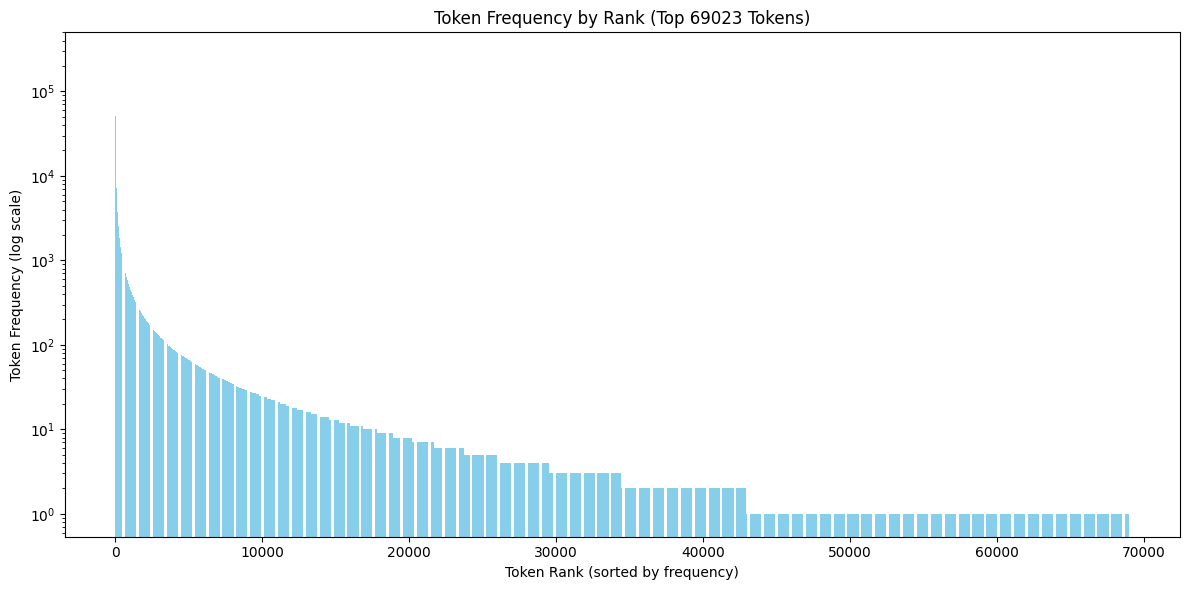

In [42]:
#---- this is quite lengthy

import matplotlib.pyplot as plt

# Assuming you already have `sorted_by_freq_tuples` from earlier code
# It's a list of (token, count) tuples, sorted by count in descending order

# Extract the frequencies (the counts)
frequencies = [count for token, count in sorted_by_freq_tuples]

print(f"len(frequencies): {len(frequencies)}")

# Optional: limit to top N tokens for readability
N = len(frequencies)  # you can adjust this
frequencies = frequencies[:N]

# Plot
plt.figure(figsize=(12, 6))
plt.bar(range(len(frequencies)), frequencies, color='skyblue')
#plt.xscale('log')
plt.yscale('log')  # Optional: log scale to show small and large counts together
plt.xlabel('Token Rank (sorted by frequency)')
plt.ylabel('Token Frequency (log scale)')
plt.title(f'Token Frequency by Rank (Top {N} Tokens)')
plt.tight_layout()
plt.show()

In [43]:
print(sorted_by_freq_tuples[-1])
print(len(sorted_by_freq_tuples))

('fictive', 1)
69023


In [44]:
# Step 4: Limit the vocabulary to the top N (e.g., 69023) tokens (including special tokens) --- this is an hyper-parameter
# The padding token (pad) is used to ensure that all sequences in a batch have the same length.
# The unknown token (unk) is used to represent words that are not found in the model's vocabulary (the top 69023 words in your case).
# Any word that doesn't appear in the vocabulary is replaced by the unk token during tokenization.
# This is critical for handling unseen words during inference, where the model encounters words that were not present in the training data.
limited_sorted_by_freq_tuples = sorted_by_freq_tuples[:69023]  # Top 69023 + pad and unk

# Step 5: Create an ordered dictionary for the vocab
ordered_dict = OrderedDict(limited_sorted_by_freq_tuples)

# Step 6: Create vocab dictionary with special tokens
# Initializes the vocab dictionary with two special tokens
vocab = {"<pad>": 0, "<unk>": 1}

for idx, (token, count) in enumerate(ordered_dict.items(), start=2):  # Start from 2 to skip the special tokens
    vocab[token] = idx


# Print the vocabulary size (should be 69023)
print('Vocab-size:', len(vocab))

# --- Rationale:
#
# By assigning frequent words lower indices, we can optimize memory and computational efficiency.
# Words that appear infrequently can either be assigned higher indices (in case we want to keep them) or omitted from the vocabulary entirely.

Vocab-size: 69025


In [45]:
print(ordered_dict['the'])
print(vocab['the'])


267877
2


In [46]:
select_entry = 0
the_key, the_value = list(vocab.items())[select_entry]
print(f"entry[{select_entry}]: {the_key} -> {the_value}")

entry[0]: <pad> -> 0


In [48]:

# Use the vocab to encode a list of tokens
def encode(tokens):
    #If the token does not exist in the vocab, the function returns the index of the <unk>
    return [vocab.get(token, vocab["<unk>"]) for token in tokens]
# Example usage
print(encode(['this', 'is', 'an', 'example', 'bellissimo']))  # Should output something like [11, 7, 35, 457]


[11, 7, 35, 457, 1]


In [49]:
if not torch.cuda.is_available():
    print("Warning: this code may be very slow on CPU")

In [50]:
import torch
import torch.nn as nn
import re

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Use the manual vocab creation process from earlier
# Assuming `vocab` and `tokenizer` are already defined

#text_pipeline = lambda x: [vocab[token] for token in tokenizer(x)]
# Updated text pipeline
text_pipeline = lambda x: [vocab.get(token, vocab["<unk>"]) for token in tokenizer(x)]

# Manual label processing, see later
label_pipeline = lambda x: float(x)  # Convert to float to match the output


# Batch collation function
def collate_batch(batch):
    label_list, text_list, lengths = [], [], []
    for entry in batch:  # Each 'entry' is a dictionary with 'text' and 'label'
        _label = entry['label']
        _text = entry['text']

        # Process labels and text
        label_list.append(label_pipeline(_label))  # Convert labels using label_pipeline
        processed_text = torch.tensor(text_pipeline(_text), dtype=torch.int64)  # Convert text to indices

        # Store processed text and its length
        text_list.append(processed_text)
        lengths.append(processed_text.size(0))

    # Convert lists to tensors and pad sequences
    label_list = torch.tensor(label_list)
    lengths = torch.tensor(lengths)
    padded_text_list = nn.utils.rnn.pad_sequence(text_list, batch_first=True)
    # the padding is based on the length of the longest sequence in the current batch.

    return padded_text_list.to(device), label_list.to(device), lengths.to(device)


In [51]:
#-----  Example usage with DataLoader -----#
## Take a small batch

dataloader = DataLoader(train_dataset, batch_size=4, shuffle=False, collate_fn=collate_batch)

dataloader_iter = iter(dataloader)

text_batch, label_batch, length_batch = next(dataloader_iter)

# Print the output batch
print("Text batch:", text_batch)
print("Label batch:", label_batch)
print("Length batch:", length_batch)
print("Text batch shape:", text_batch.shape)


Text batch: tensor([[   35,  1739,     7,   449,   721,     6,   301,     4,   787,     9,
             4,    18,    44,     2,  1705,  2460,   186,    25,     7,    24,
           100,  1874,  1739,    25,     7, 34415,  3568,  1103,  7517,   787,
             5,     2,  4991, 12401,    36,     7,   148,   111,   939,     6,
         11598,     2,   172,   135,    62,    25,  3199,  1602,     3,   928,
          1500,     9,     6,  4601,     2,   155,    36,    14,   274,     4,
         42945,     9,  4991,     3,    14, 10296,    34,  3568,     8,    51,
           148,    30,     2,    58,    16,    11,  1893,   125,     6,   420,
          1214,    27, 14542,   940,    11,     7,    29,   951,    18,    17,
         15994,   459,    34,  2480, 15211,  3713,     2,   840,  3200,     9,
          3568,    13,   107,     9,   175,    94,    25,    51, 10297,  1796,
            27,   712,    16,     2,   220,    17,     4,    54,   722,   238,
           395,     2,   787,    32,    

In [52]:
text_batch, label_batch, length_batch = next(dataloader_iter)

# Print the output batch
print("Text batch:", text_batch)
print("Label batch:", label_batch)
print("Length batch:", length_batch)
print("Text batch shape:", text_batch.shape)

Text batch: tensor([[  10,  256,    2,  ...,    0,    0,    0],
        [  11,    7,    4,  ...,    0,    0,    0],
        [ 155, 1730, 4554,  ...,   59,  630,  131],
        [  42,   32,  219,  ...,    0,    0,    0]], device='cuda:0')
Label batch: tensor([1., 0., 1., 1.], device='cuda:0')
Length batch: tensor([ 116,  165, 1167,  134], device='cuda:0')
Text batch shape: torch.Size([4, 1167])


In [56]:
#------------------------------------- ADDITIONAL TESTS -------------------------------------

In [53]:
# Check the first few labels in the dataset
for i in range(4):
    print(f"Label {i}: {train_dataset[i]['label']}")

Label 0: 1
Label 1: 1
Label 2: 1
Label 3: 0


In [54]:
# Debug tokenization and vocab lookup
sample_text = "This is an example sentence."
tokens = tokenizer(sample_text)
print("Tokens:", tokens)  # Should print tokenized text

token_indices = [vocab.get(token, vocab["<unk>"]) for token in tokens]
print("Token indices:", token_indices)  # Should print the vocab indices for each token


Tokens: ['this', 'is', 'an', 'example', 'sentence']
Token indices: [11, 7, 35, 457, 4063]


In [55]:
# Access both text and label for the first 5 entries
for i in range(5):
    entry = train_dataset[i]
    print(f"Text: {entry['text']}, Label: {entry['label']}")


Text: An extra is called upon to play a general in a movie about the Russian Revolution. However, he is not any ordinary extra. He is Serguis Alexander, former commanding general of the Russia armies who is now being forced to relive the same scene, which he suffered professional and personal tragedy in, to satisfy the director who was once a revolutionist in Russia and was humiliated by Alexander. It can now be the time for this broken man to finally "win" his penultimate battle. This is one powerful movie with meticulous direction by Von Sternberg, providing the greatest irony in Alexander's character in every way he can. Jannings deserved his Oscar for the role with a very moving performance playing the general at his peak and at his deepest valley. Powell lends a sinister support as the revenge minded director and Brent is perfect in her role with her face and movements showing so much expression as Jannings' love. All around brilliance. Rating, 10., Label: 1
Text: almost every rev

In [ ]:
#------------------------------------------------------------------------------

In [57]:
## Batching the datasets

batch_size = 32

train_dl = DataLoader(train_dataset, batch_size=batch_size,
                      shuffle=True, collate_fn=collate_batch)
valid_dl = DataLoader(valid_dataset, batch_size=batch_size,
                      shuffle=False, collate_fn=collate_batch)
test_dl = DataLoader(test_dataset, batch_size=batch_size,
                     shuffle=False, collate_fn=collate_batch)

### The Embedding Matrix

We use an embedding matrix in an RNN pipeline to convert discrete word indices into dense, real-valued vectors that can be effectively processed by neural networks.

* Shape: `[vocab_size, embedding_dim]`

* Each row is a vector representation of a token.

* Each element in the matrix is a trainable parameter (a real number

In [ ]:
# URL of the image from GitHub
img_url = "https://raw.githubusercontent.com/cfteach/NNDL_DATA621/860d5f694ae8642fad21fba91e1a233e44a74881/DATA621/DATA621/images/Indexing_comments_IMDB.png"

# Display the image
Image(url=img_url, width = 600)

In [58]:
# The embedding layer in the code is used for converting integer indices
# (which represent words or tokens in the vocabulary) into dense vector representations,
# also known as embeddings

# ---> words with similar meanings or roles (based on the task) end up with similar vector representations

# e.g.,
embedding = nn.Embedding(num_embeddings=10, # This specifies the size of the vocabulary. In this example, it has 10 indices (from 0 to 9)
                         embedding_dim=3,   # Each token in the vocabulary will be represented by a 3-dimensional vector.
                         padding_idx=0)     # This is used to specify that index 0 is reserved for padding.
                                            # The embedding corresponding to the index 0 will be all zeros, and it will not be updated during training.
                                            # As discussed, padding is used when input sequences of varying lengths are padded with zeros to make them of same length.

# a batch of 2 samples of 4 indices each
text_encoded_input = torch.LongTensor([[1,2,4,5],[4,3,2,0]])
print(embedding(text_encoded_input))

# The embedding layer can be thought of as a parameterized layer in a neural network.
# Unlike fully connected layers where you often apply activation functions, it is purely a lookup operation followed by gradient-based learning.

tensor([[[-0.4651, -0.3203,  2.2408],
         [ 0.3824, -0.3446, -0.3531],
         [-0.0251, -0.5973, -0.2959],
         [ 0.8356,  0.4025, -0.6924]],

        [[-0.0251, -0.5973, -0.2959],
         [ 0.9124, -0.4643,  0.3046],
         [ 0.3824, -0.3446, -0.3531],
         [ 0.0000,  0.0000,  0.0000]]], grad_fn=<EmbeddingBackward0>)


### Building an RNN model

* **Several RNN layers:**
  * `nn.RNN(input_size, hidden_size, num_layers=1)`
  * `nn.LSTM(..)`
  * `nn.GRU(..)`
  * `nn.RNN(input_size, hidden_size, num_layers=1, bidirectional=True)`



In [ ]:
"""
## EXAMPLE
## with simple RNN layer

# Fully connected neural network with one hidden layer
class RNN(nn.Module):
    def __init__(self, input_size, hidden_size):
        super().__init__()
        self.rnn = nn.RNN(input_size, # specifies the number of features
                          hidden_size,
                          num_layers=2,
                          batch_first=True)
        #self.gru = nn.GRU(input_size, hidden_size, num_layers, batch_first=True)
        #self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        _, hidden = self.rnn(x)
        out = hidden[-1, :, :] # select last layer of hidden units, for all (:) sequencs in the batch and for all (:) features in the hidden unit
        out = self.fc(out)
        return out

model = RNN(64, 32)

print(model)


model(torch.randn(5, 3, 64)) # 5 batches, 3 times steps, 64 features
"""

'\n## An example of building a RNN model\n## with simple RNN layer\n\n# Fully connected neural network with one hidden layer\nclass RNN(nn.Module):\n    def __init__(self, input_size, hidden_size):\n        super().__init__()\n        self.rnn = nn.RNN(input_size, # specifies the number of features\n                          hidden_size, \n                          num_layers=2, \n                          batch_first=True)\n        #self.gru = nn.GRU(input_size, hidden_size, num_layers, batch_first=True)\n        #self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)\n        self.fc = nn.Linear(hidden_size, 1)\n        \n    def forward(self, x):\n        _, hidden = self.rnn(x)\n        out = hidden[-1, :, :]\n        out = self.fc(out)\n        return out\n\nmodel = RNN(64, 32) \n\nprint(model) \n \n\nmodel(torch.randn(5, 3, 64)) # 5 batches, 3 times steps, 64 features\n'

### Building an RNN model for the sentiment analysis task

In [67]:
# In the following, the embedding layer creates the number of features that will be fed into the RNN

class RNN(nn.Module):
    def __init__(self, vocab_size, embed_dim, rnn_hidden_size, fc_hidden_size):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size,
                                      embed_dim,
                                      padding_idx=0)
        self.rnn = nn.LSTM(embed_dim, rnn_hidden_size, batch_first=True) # batch_first=True => (batch, seq_len, features)
        self.fc1 = nn.Linear(rnn_hidden_size, fc_hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(fc_hidden_size, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, text, lengths):
        out = self.embedding(text)

        out = nn.utils.rnn.pack_padded_sequence(out, lengths.cpu().numpy(), enforce_sorted=False, batch_first=True)
        # Tells the LSTM to ignore padding tokens based on the actual sequence lengths
        # enforce_sorted=False: assumes inputs aren’t sorted by length (safer & simpler)

        out, (hidden, cell) = self.rnn(out) # cell is a long-term memory state produced by RNN, that is used to compute the new hidden state
        out = hidden[-1, :, :]              # Get the final layer's hidden state
        out = self.fc1(out)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.sigmoid(out)
        return out

vocab_size = len(vocab)
embed_dim = 20
rnn_hidden_size = 64
fc_hidden_size = 64

torch.manual_seed(1)
model = RNN(vocab_size, embed_dim, rnn_hidden_size, fc_hidden_size)
model = model.to(device)


<img src="https://drive.google.com/uc?export=view&id=1jikt02AMR1uWuG-04XYHtxVZ1mfBOzSt" width="600">


More info: https://docs.google.com/presentation/d/1X8Tq_L4ChK8zh5DDts34N6w-2IAmNw12n7fLwJnzRdM/edit?slide=id.g300d167a674_0_0#slide=id.g300d167a674_0_0






---



### **Summary**

| Concept                   | Explanation |
|---------------------------|-------------|
| **RNN processes words**   | One at a time ( `x₀`, `x₁`, `x₂`, … ) |
| **Final hidden state**    | Represents the **whole sentence** (up to the last real word) |
| **Output of model**       | Based on that final state, passed through FC layers |
| **Variable length sequences** | Handled via padding + `pack_padded_sequence` |


### **Concrete example with `batch_size=2`**

**Sentences:**
1. `"I love it"` → 3 words  
2. `"Amazing"` → 1 word

After padding to match the longer sequence (length 3):

| Batch | Tokens                    | Length |
|-------|----------------------------|--------|
| 0     | `["I", "love", "it"]`      | 3      |
| 1     | `["Amazing", PAD, PAD]`    | 1      |

So input to `nn.Embedding` → shape `(2, 3, embed_dim)`


### **`hidden[-1]` holds the final hidden state for each sentence**

The LSTM processed each word one-by-one, **stores and returns the final state** for each sentence:

| Batch | Last Word Seen | Final Hidden (`hidden[-1]`) | Used for Classification? |
|-------|----------------|-----------------------------|---------------------------|
| 0     | `"it"`         | `h_t=3`                     |yes                    |
| 1     | `"Amazing"`    | `h_t=1`                     |yes                    |

So you can think of `hidden[-1, i, :]` as a summary vector of the entire `i`-th sentence — everything the RNN has seen up to that point.







---



In [68]:
loss_fn = nn.BCELoss()

In [69]:
def train(dataloader):
    model.train()
    total_acc, total_loss = 0, 0
    for text_batch, label_batch, lengths in dataloader:
        optimizer.zero_grad()
        pred = model(text_batch, lengths)[:, 0]
        loss = loss_fn(pred, label_batch)
        loss.backward()
        optimizer.step()
        total_acc += ((pred>=0.5).float() == label_batch).float().sum().item()
        total_loss += loss.item()*label_batch.size(0)
    return total_acc/len(dataloader.dataset), total_loss/len(dataloader.dataset)

def evaluate(dataloader):
    model.eval()
    total_acc, total_loss = 0, 0
    with torch.no_grad():
        for text_batch, label_batch, lengths in dataloader:
            pred = model(text_batch, lengths)[:, 0]
            loss = loss_fn(pred, label_batch)
            total_acc += ((pred>=0.5).float() == label_batch).float().sum().item()
            total_loss += loss.item()*label_batch.size(0)
    return total_acc/len(dataloader.dataset), total_loss/len(dataloader.dataset)

In [ ]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

num_epochs = 5

torch.manual_seed(1)

for epoch in range(num_epochs):
    acc_train, loss_train = train(train_dl)
    acc_valid, loss_valid = evaluate(valid_dl)
    print(f'Epoch {epoch} accuracy: {acc_train:.4f} val_accuracy: {acc_valid:.4f}')


Epoch 0 accuracy: 0.5354 val_accuracy: 0.4884
Epoch 1 accuracy: 0.5145 val_accuracy: 0.4878
Epoch 2 accuracy: 0.5034 val_accuracy: 0.4878


In [63]:
acc_test, _ = evaluate(test_dl)
print(f'test_accuracy: {acc_test:.4f}')

test_accuracy: 0.8478


### Select one random comment in the test dataset and compute prediction

In [66]:
import random

# Function to preprocess and predict a single comment
def predict_comment(text, model, vocab):
    model.eval()

    # Tokenize and encode the input text using the same tokenizer and vocab as used during training
    tokens = tokenizer(text)
    encoded_text = [vocab.get(token, vocab["<unk>"]) for token in tokens]

    # Convert the tokens to tensor and add batch dimension
    text_tensor = torch.tensor(encoded_text).unsqueeze(0).to(device)  # Add batch dimension

    # Length tensor (since we are processing a single comment, length is just the length of the sequence)
    lengths_tensor = torch.tensor([len(encoded_text)]).to(device)

    with torch.no_grad():
        prediction = model(text_tensor, lengths_tensor)[:, 0]

    # Apply threshold of 0.5 for binary classification (as the model uses Sigmoid)
    prediction_label = 1 if prediction >= 0.5 else 0

    return prediction.item(), prediction_label

# Select a random sample from the test dataset
random_index = random.randint(0, len(test_dataset) - 1)
random_comment = test_dataset[random_index]['text']
random_label = test_dataset[random_index]['label']

# Make a prediction on this random comment
predicted_value, predicted_label = predict_comment(random_comment, model, vocab)

# Output the result
print(f"Random comment: {random_comment}")
print(f"True label: {random_label}")
print(f"Predicted value: {predicted_value:.4f}")
print(f"Predicted label: {predicted_label}")


Random comment: As a kid I loved the song "Never smile at a crocodile", and if I found myself in this state of affairs, which is actually inspired by true events. Smiling would be the last thing on my mind. From the opening set-up, I've never been so entrenched, caught up and finally exhausted like I was when watching this limited budget Independent Australian horror film, about three people in Northern Territory trapped in a mangrove swamp with a very conniving crocodile waiting in the water below them. What really brought the film alive, was how realistic it managed to be in transporting the fear and uncertainty of the characters' situation to the audience. Semi-documentary camera-work with a disquietingly eerie backdrop and authentic performances effectively take you out of your comfort zone. What we get is a patient survival tale than just a bloody, all-out creature feature onslaught. Think of "Open Water (2003)", where its budget and time restraint made sure it would stay low-key,

### Build a bi-directional LSTM

Recall:
  * `nn.RNN(input_size, hidden_size, num_layers=1)`
  * `nn.LSTM(..)`
  * `nn.GRU(..)`
  * `nn.RNN(input_size, hidden_size, num_layers=1, bidirectional=True)`


  **Do you expect this to perform better?**

### Backup

**Embedding layers for sentence encoding**


 * `input_dim`: number of words, i.e. maximum integer index + 1 (to account for for index 0)
 * `output_dim`: typically equal to the dimension of the hidden state
 * `input_length`: the length of (padded) sequence
    * for example, `'This is an example' -> [0, 0, 0, 0, 0, 0, 3, 1, 8, 9]`   
    => input_lenght is 10


Each token ID is mapped to a vector of size output_dim

So if input shape = `[BATCH_SIZE, SEQ_LEN]`

Output shape = `[BATCH_SIZE, SEQ_LEN, output_dim]`


When calling the layer, takes integer values as input, the embedding layer convert each integer into float vector of size `[output_dim]`
   * If input shape is `[BATCH_SIZE]`, output shape will be `[BATCH_SIZE, output_dim]`
   * If input shape is `[BATCH_SIZE, 10]`, output shape will be `[BATCH_SIZE, 10, output_dim]`